In [1]:
!pip install imblearn

In [50]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, metrics
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [3]:
data1 = pd.read_csv("Lung_data.csv")
data1.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
data1.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [6]:
data1.columns = data1.columns.str.lower()
data1.columns

Index(['gender', 'age', 'smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic disease', 'fatigue ', 'allergy ', 'wheezing',
       'alcohol consuming', 'coughing', 'shortness of breath',
       'swallowing difficulty', 'chest pain', 'lung_cancer'],
      dtype='object')

In [7]:
data1["lung_cancer"].unique()

array(['YES', 'NO'], dtype=object)

In [8]:
data1["gender"].unique()

array(['M', 'F'], dtype=object)

#  Encoding my Dataset

In [9]:
data1['lung_cancer'].replace(to_replace=["YES", "NO"], value = [1, 0], inplace = True)

In [10]:
data1['gender'].replace(to_replace=["M", "F"], value = [1, 0], inplace = True)

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   gender                 309 non-null    int64
 1   age                    309 non-null    int64
 2   smoking                309 non-null    int64
 3   yellow_fingers         309 non-null    int64
 4   anxiety                309 non-null    int64
 5   peer_pressure          309 non-null    int64
 6   chronic disease        309 non-null    int64
 7   fatigue                309 non-null    int64
 8   allergy                309 non-null    int64
 9   wheezing               309 non-null    int64
 10  alcohol consuming      309 non-null    int64
 11  coughing               309 non-null    int64
 12  shortness of breath    309 non-null    int64
 13  swallowing difficulty  309 non-null    int64
 14  chest pain             309 non-null    int64
 15  lung_cancer            309 non-null    i

#  EXPLORATORY DATA ANALYSIS

In [12]:
data1.head(10)

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic disease,fatigue,allergy,wheezing,alcohol consuming,coughing,shortness of breath,swallowing difficulty,chest pain,lung_cancer
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
5,0,75,1,2,1,1,2,2,2,2,1,2,2,1,1,1
6,1,52,2,1,1,1,1,2,1,2,2,2,2,1,2,1
7,0,51,2,2,2,2,1,2,2,1,1,1,2,2,1,1
8,0,68,2,1,2,1,1,2,1,1,1,1,1,1,1,0
9,1,53,2,2,2,2,2,1,2,1,2,1,1,2,2,1


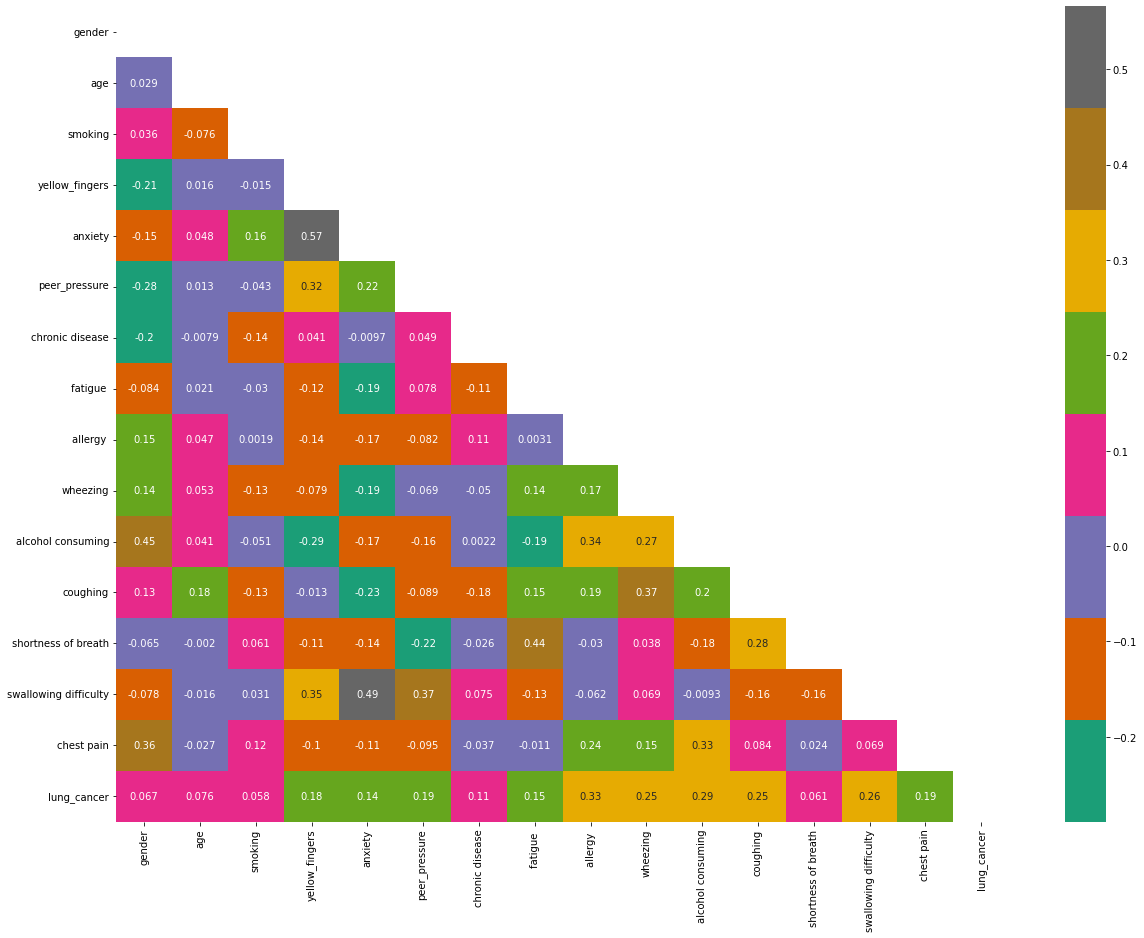

In [13]:
corr=data1.corr(method='spearman')
plt.figure(figsize=(20,15))
sns.heatmap(corr, cmap='Dark2', annot=True, fmt='.2g',
mask=np.triu(corr))
plt.show()


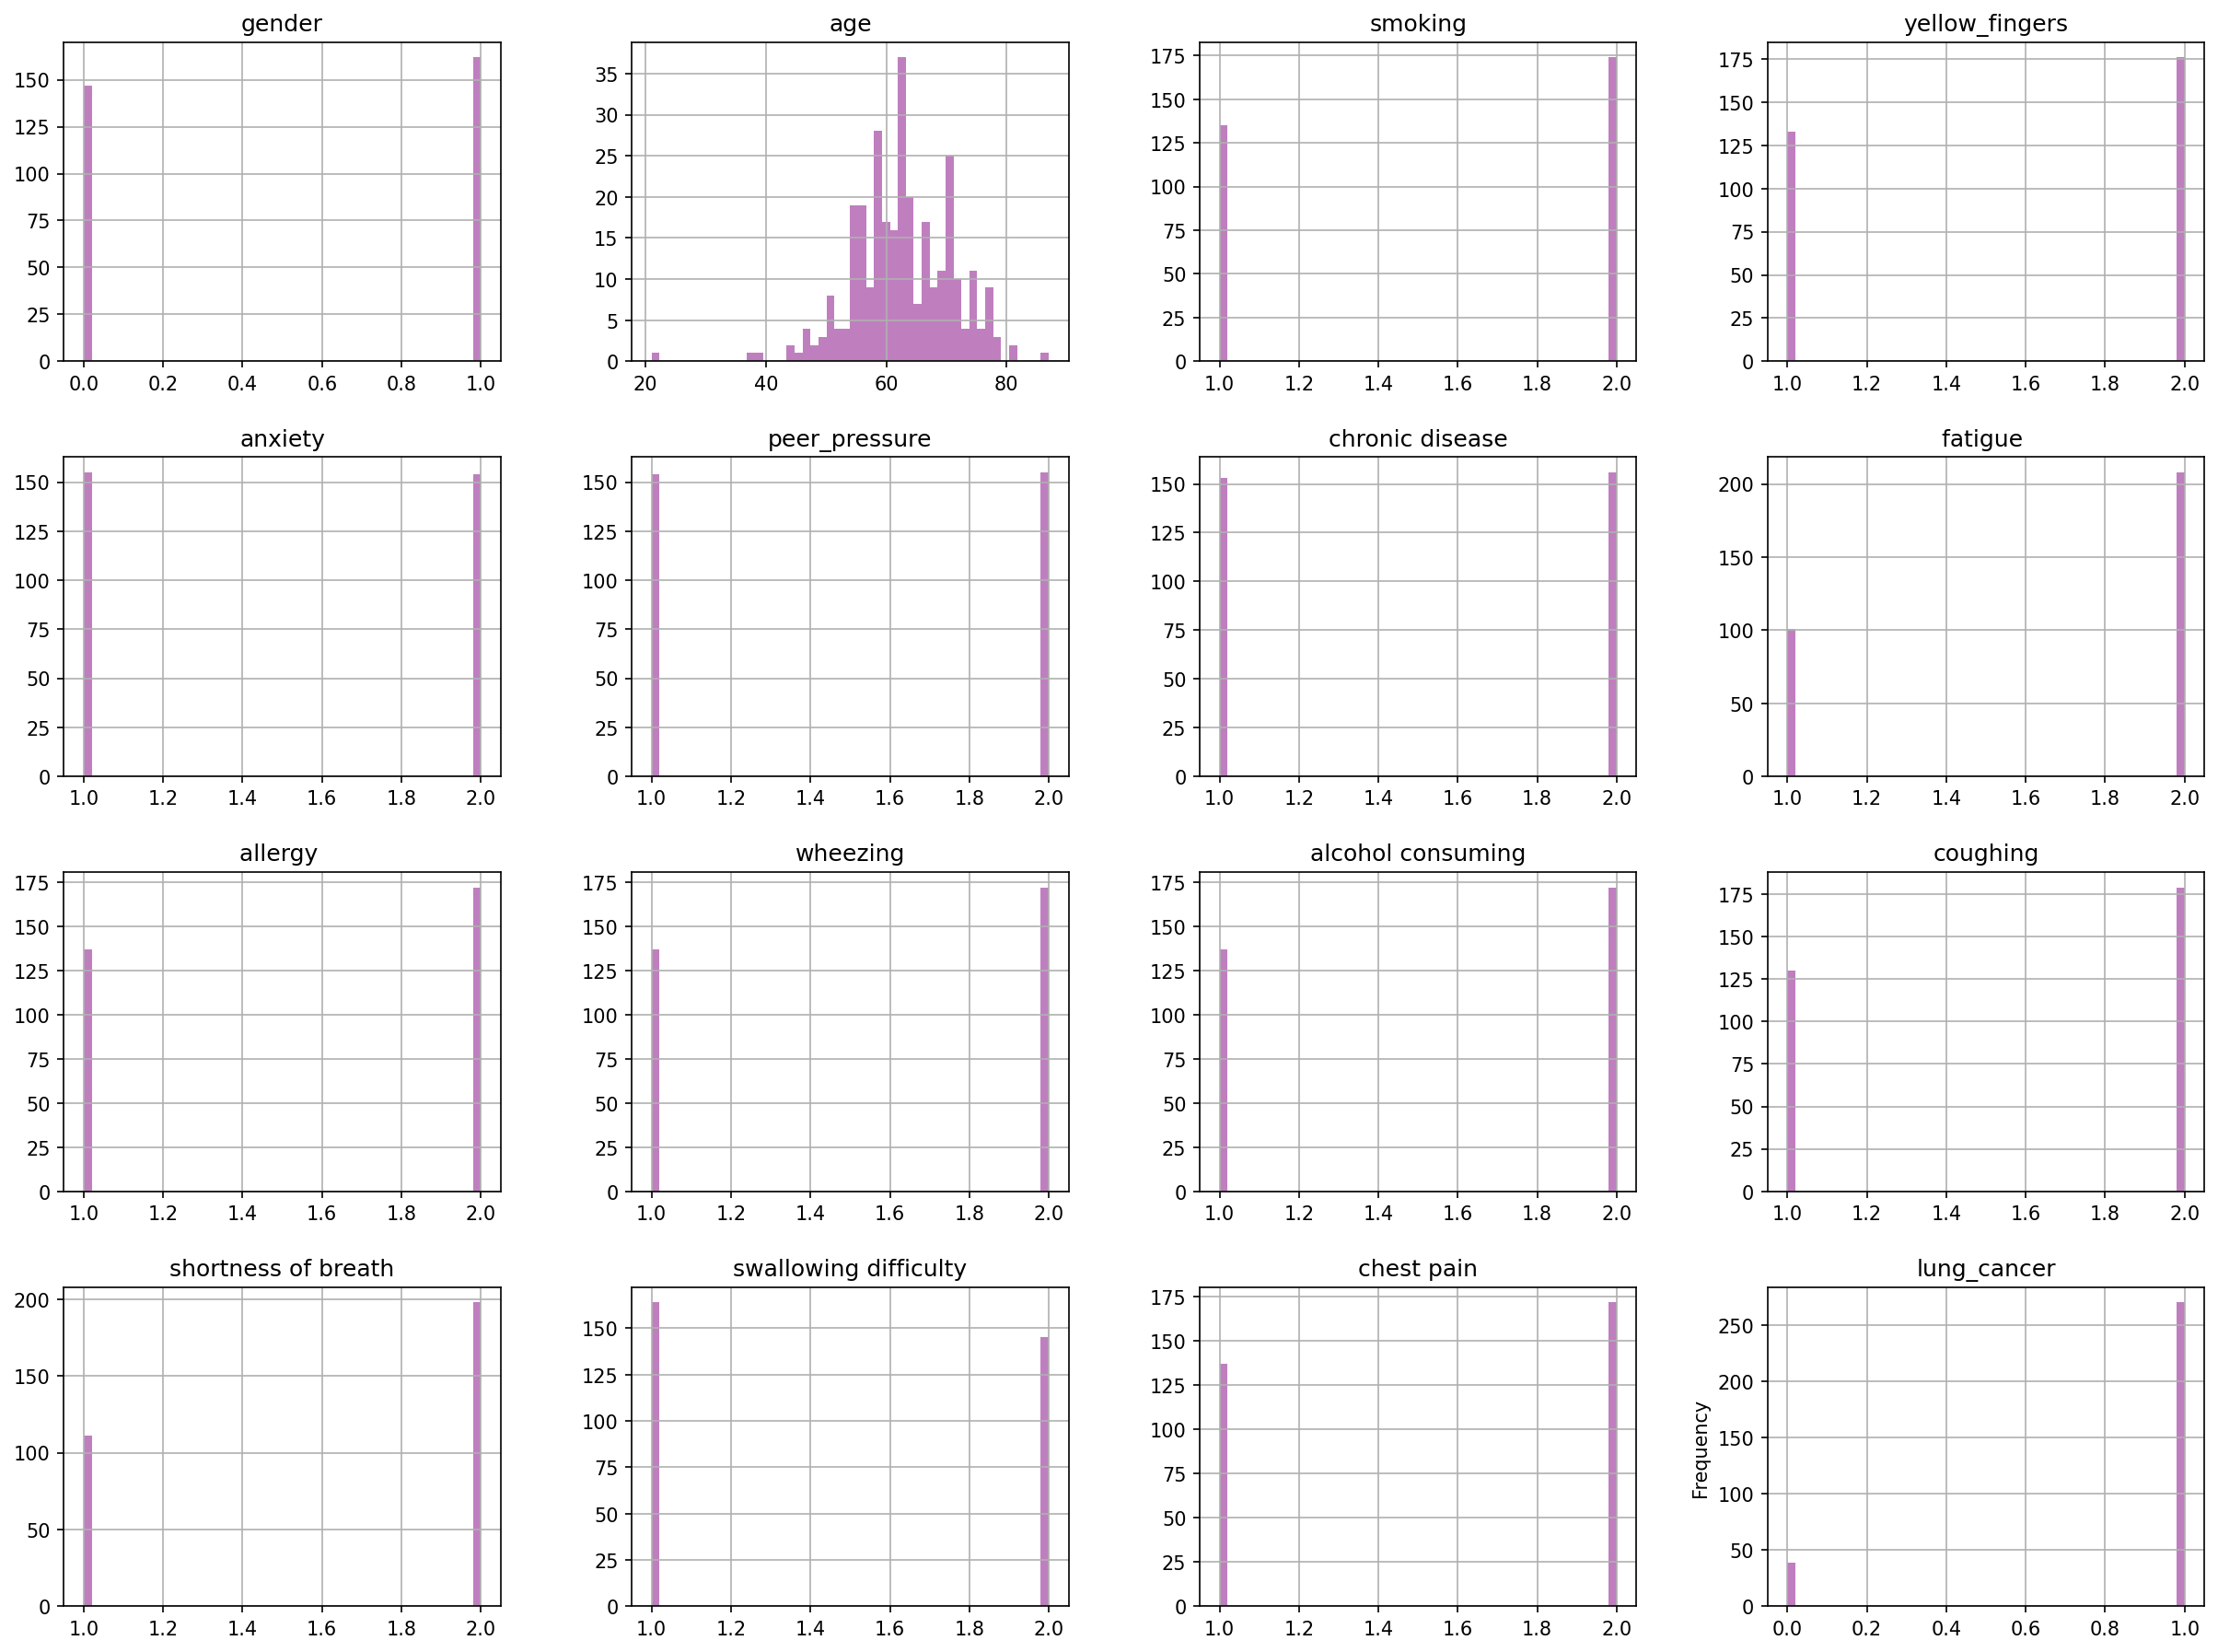

In [14]:
fig,ax=plt.subplots(figsize = (20, 15), dpi = 150)
data1.hist(bins = 50, alpha = 0.5, color='purple', ax=ax)
plt.ylabel('Frequency')
plt.show()

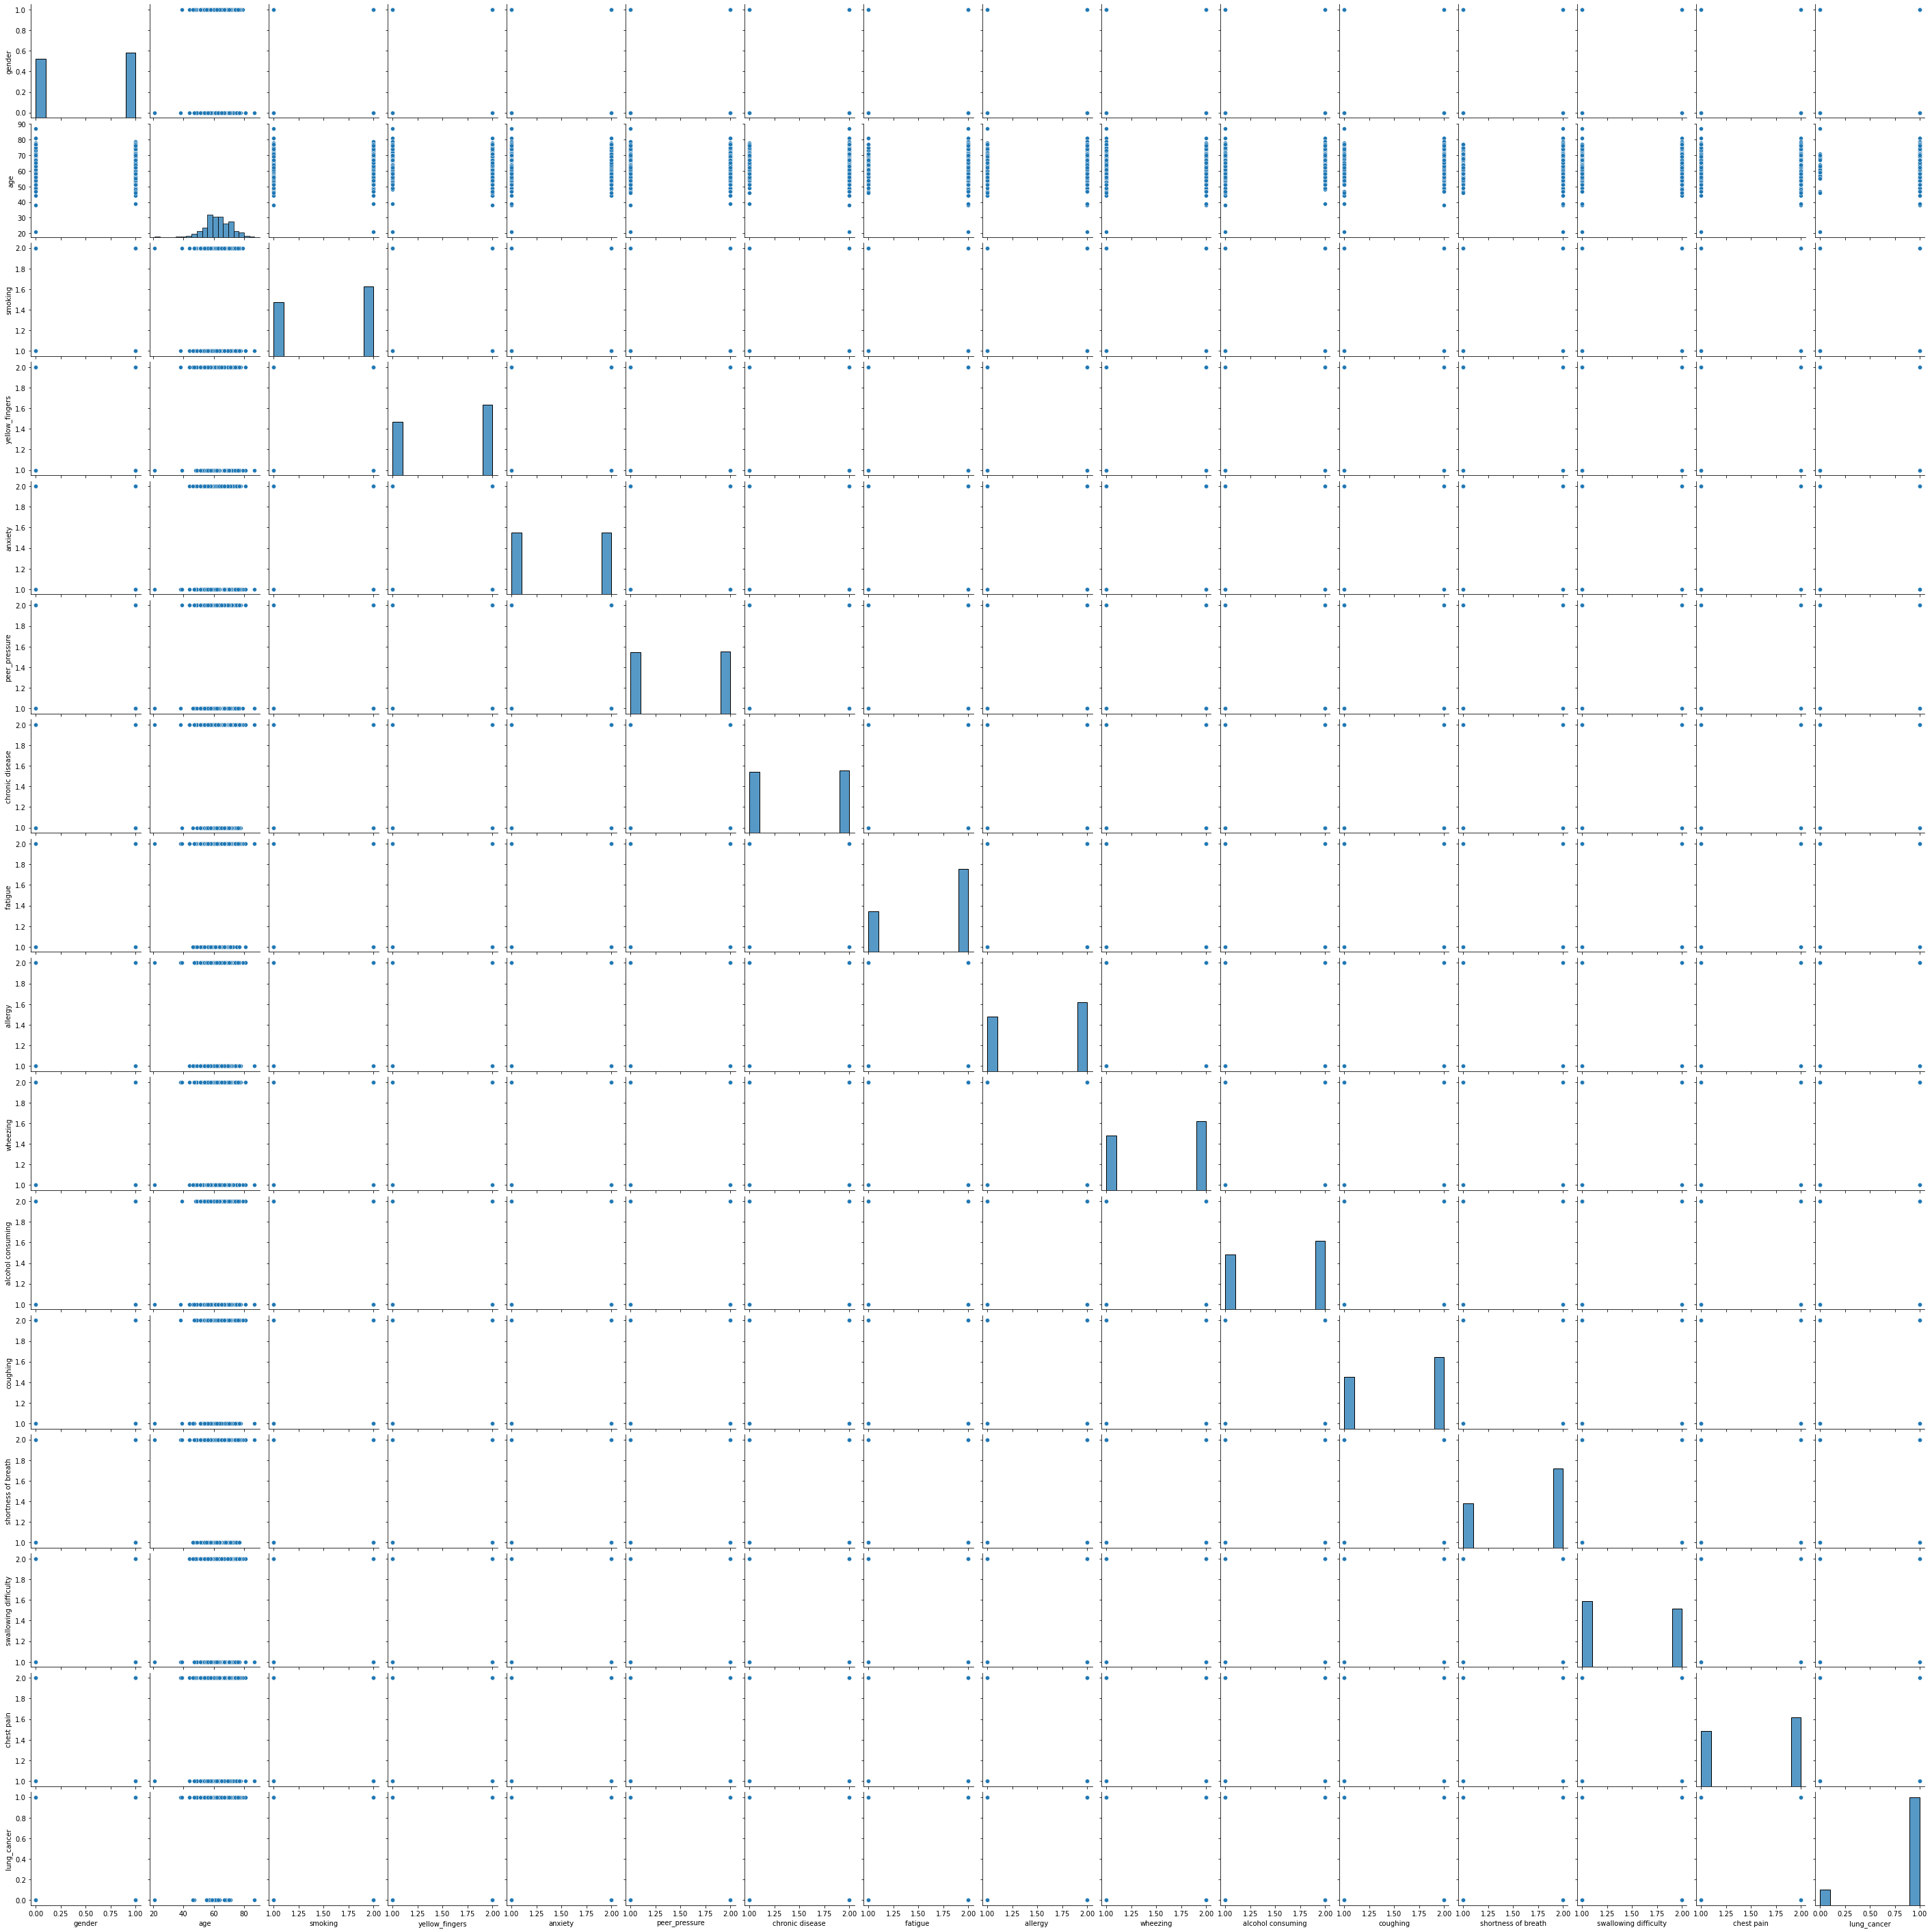

In [15]:
sns.pairplot(data1)

#  DIMENSIONALITY REDUCTION

In [16]:
column_drop = ["anxiety", "peer_pressure"]

In [17]:
data1.drop(column_drop, axis = 1, inplace = True)

REMOVING DUPLICATE

In [18]:
data1['lung_cancer'].value_counts()

1    270
0     39
Name: lung_cancer, dtype: int64

In [19]:
data1.duplicated().sum()

33

In [20]:
data1.drop_duplicates(inplace=True)

In [21]:
data1['lung_cancer'].value_counts()

1    238
0     38
Name: lung_cancer, dtype: int64

checking for empty cells in the dataset

In [22]:
data1.isnull().sum()

gender                   0
age                      0
smoking                  0
yellow_fingers           0
chronic disease          0
fatigue                  0
allergy                  0
wheezing                 0
alcohol consuming        0
coughing                 0
shortness of breath      0
swallowing difficulty    0
chest pain               0
lung_cancer              0
dtype: int64

#  EXPLORATORY ANALYSIS AFTER CLEANING

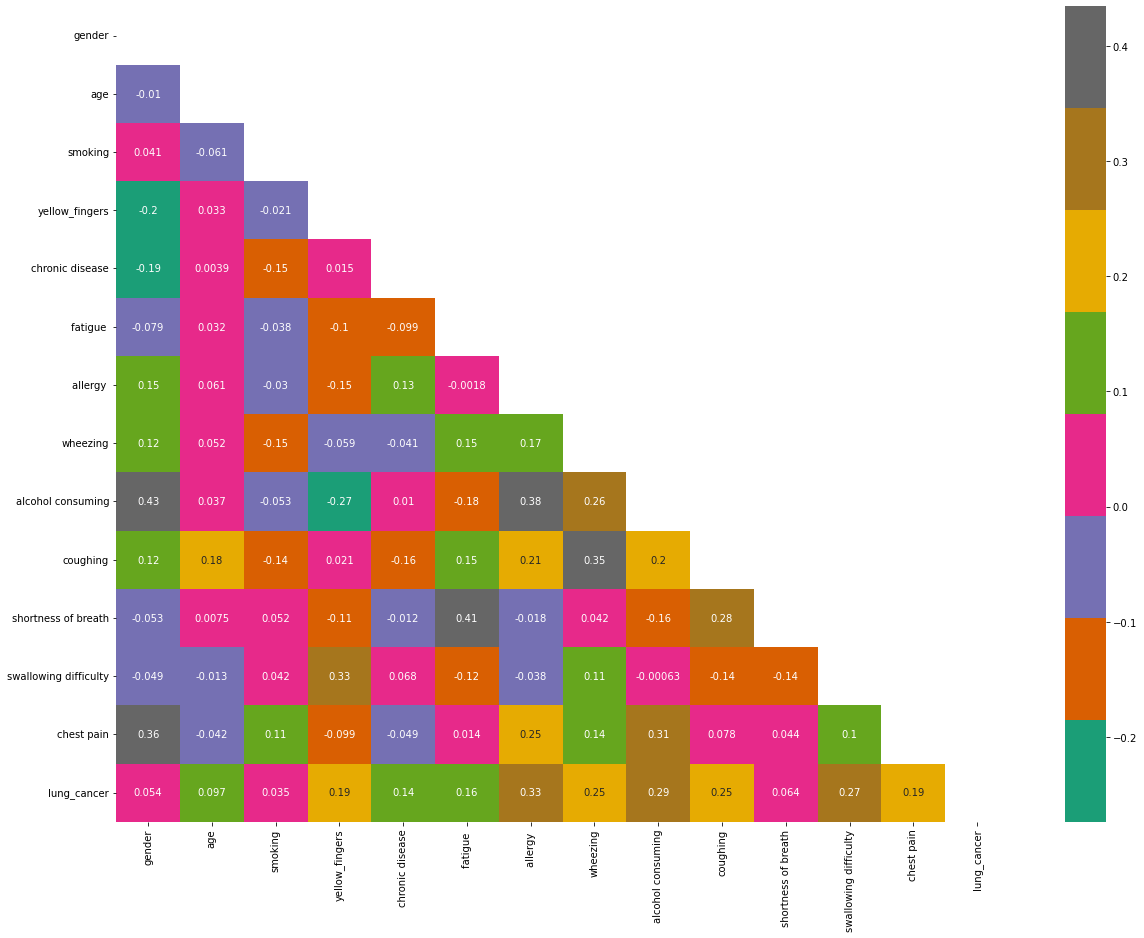

In [23]:
corr=data1.corr(method='spearman')
plt.figure(figsize=(20,15))
sns.heatmap(corr, cmap='Dark2', annot=True, fmt='.2g',
mask=np.triu(corr))
plt.show()

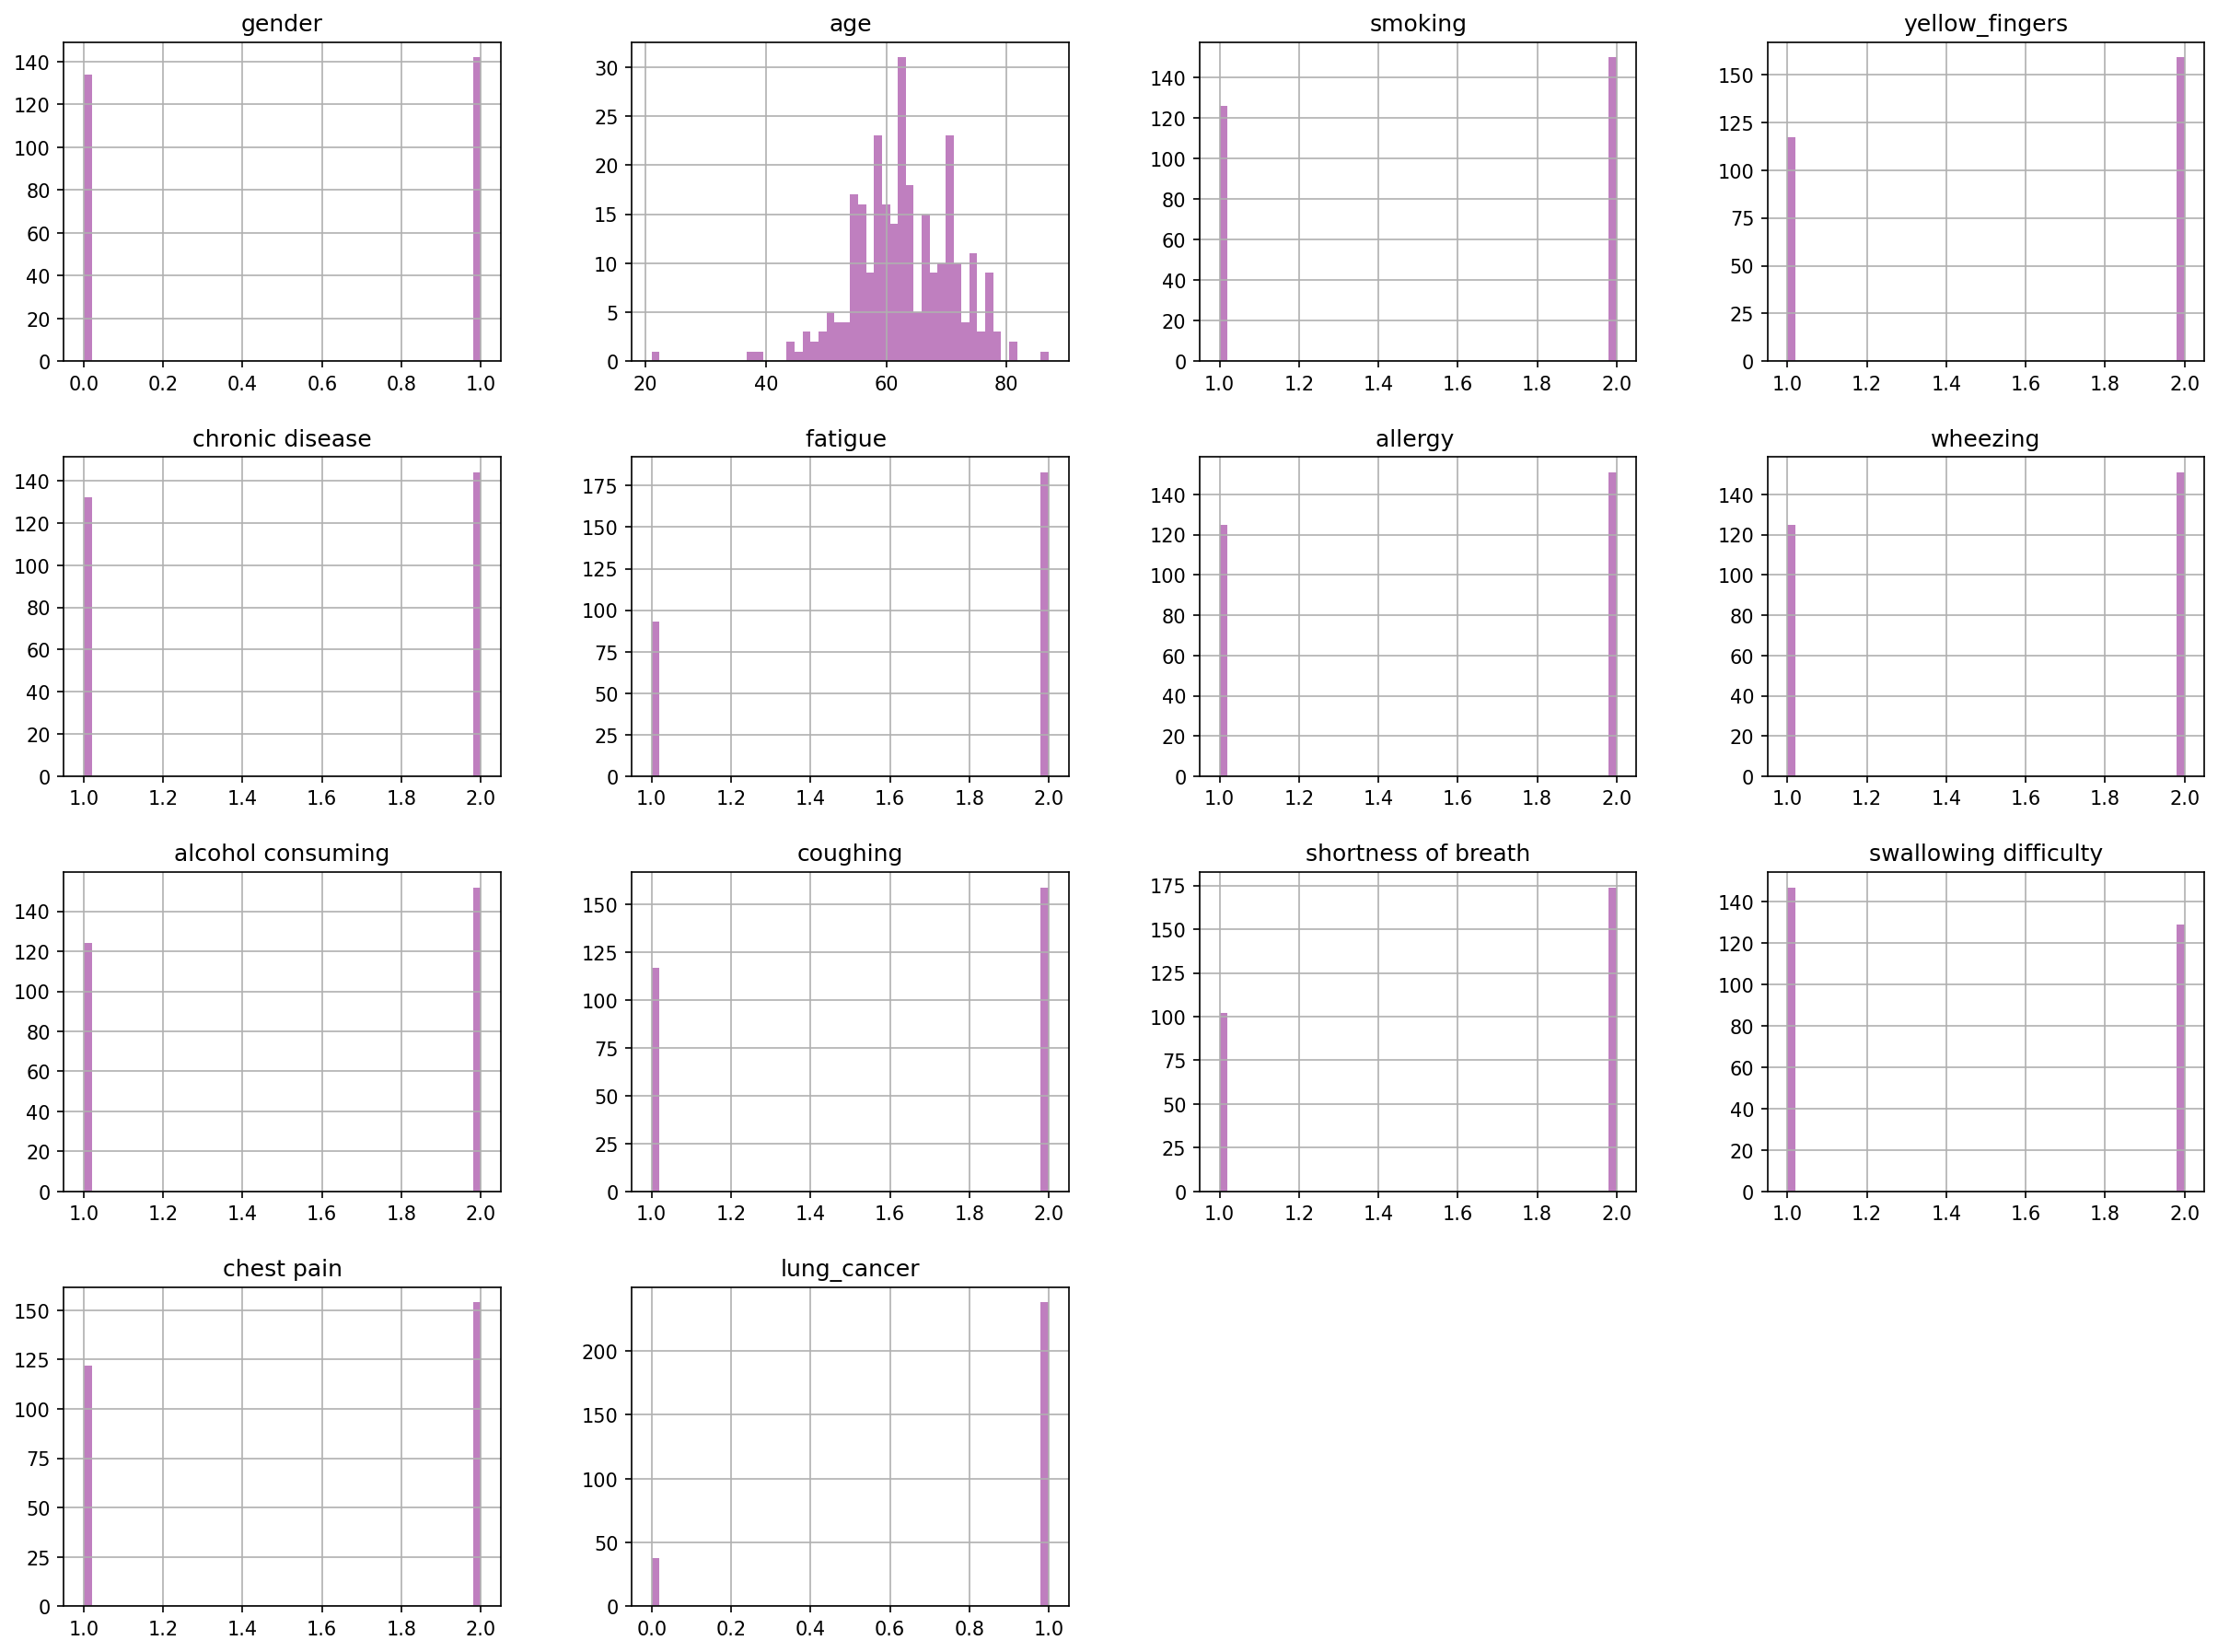

In [24]:
fig,ax=plt.subplots(figsize = (20, 15), dpi = 150)
data1.hist(bins = 50, alpha = 0.5, color='purple', ax=ax)
plt.ylabel('Frequency')
plt.show()

BOX PLOT FOR AGE

<AxesSubplot:xlabel='age'>

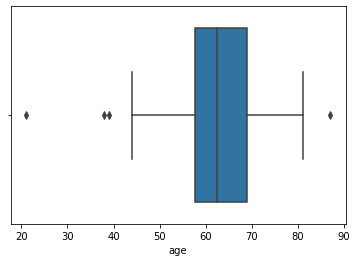

In [25]:
sns.boxplot(data1["age"])

#Since Age is a protected characteristics age 20 which shows as an outlier shouldnt be removed

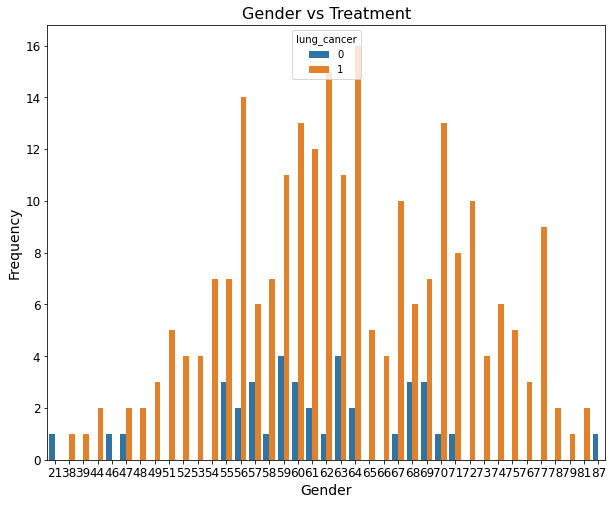

In [53]:
fig = plt.figure(figsize=(10, 8))

sns.countplot(data=data1, x="age", hue="lung_cancer")

plt.title(label='Gender vs Treatment', size=16)
plt.xlabel(xlabel='Gender', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

#  VISUALIZING RELATIONSHIP

In [26]:
# function for plotting
def plot(col, df=data1):
    return data1.groupby(col)['lung_cancer'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(6,4))

<AxesSubplot:xlabel='alcohol consuming'>

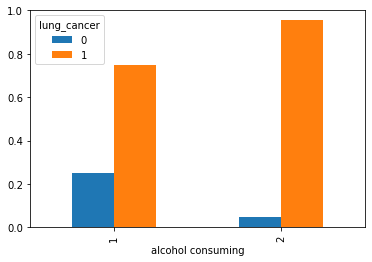

In [27]:
plot("alcohol consuming")

<AxesSubplot:xlabel='gender'>

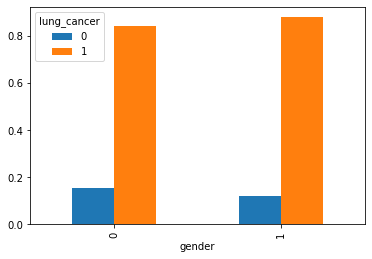

In [28]:
plot("gender")

In [29]:
def plot(col, df=data1):
    return data1.groupby(col)['alcohol consuming'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(6,4))

<AxesSubplot:xlabel='gender'>

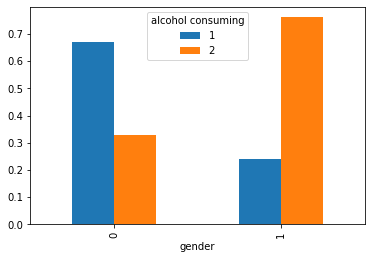

In [30]:
plot("gender")

#  CREATING THE MODEL

In [31]:
training= data1.drop("lung_cancer", axis = 1)
testing= data1["lung_cancer"]

In [32]:
training_train, training_test, testing_train, testing_test= train_test_split(training, testing, test_size=0.25,random_state=21)
print (training_train.shape, training_test.shape, testing_train.shape, testing_test.shape)

(207, 13) (69, 13) (207,) (69,)


In [33]:
testing_train.value_counts()

1    175
0     32
Name: lung_cancer, dtype: int64

<AxesSubplot:xlabel='lung_cancer', ylabel='count'>

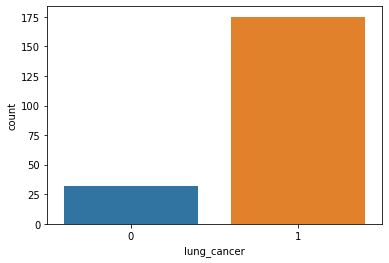

In [34]:
sns.countplot(testing_train)

In [35]:
#There is an imbalance, therefore it will be ideal to handle such first before training our model
#sm = SMOTE()
#training_train, testing_train = sm.fit_resample(training_train, testing_train)

<AxesSubplot:xlabel='lung_cancer', ylabel='count'>

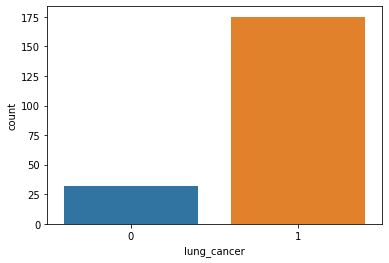

In [36]:
sns.countplot(testing_train)

### Random Forest

In [39]:

rf=RandomForestClassifier(n_estimators=10,n_jobs=-1, min_samples_leaf = 0.01, random_state=108)
rf.fit(training_train,testing_train)

RandomForestClassifier(min_samples_leaf=0.01, n_estimators=10, n_jobs=-1,
                       random_state=108)

In [41]:
train_pred1 = rf.predict(training_train)

print("Accuracy on training data: ", metrics.accuracy_score(testing_train, train_pred1))
print("Precision on training data:", metrics.precision_score(testing_train, train_pred1))
print("Recall on training data:", metrics.recall_score(testing_train, train_pred1))
print("f1_score on training data:", metrics.f1_score(testing_train, train_pred1))

Accuracy on training data:  0.927536231884058
Precision on training data: 0.9395604395604396
Recall on training data: 0.9771428571428571
f1_score on training data: 0.9579831932773109


In [60]:
test_pred1=rf.predict(training_test)

print("Accuracy on testing data: ", metrics.accuracy_score(testing_test,test_pred1))
print("Precision on testing data:", metrics.precision_score(testing_test, test_pred1))
print("Recall on testing data:", metrics.recall_score(testing_test, test_pred1))
print("f1_score on testing data:", metrics.f1_score(testing_test, test_pred1))

Accuracy on testing data:  0.927536231884058
Precision on testing data: 0.9393939393939394
Recall on testing data: 0.9841269841269841
f1_score on testing data: 0.9612403100775193


In [43]:
importances = rf.feature_importances_

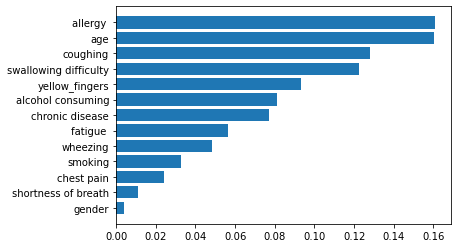

In [45]:
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(training_train.columns)[indices])

TN=2, FP=4, FN=1, TP=62


<Figure size 1440x1080 with 0 Axes>

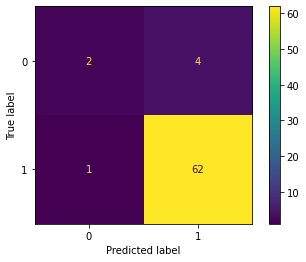

In [46]:
plt.figure(figsize=(20,15))
cm1 = metrics.confusion_matrix(testing_test, test_pred1)
TN, FP, FN, TP = cm1.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()
plt.show()

In [47]:
TP = cm1[0,0]
TN = cm1[1,1]
FP = cm1[0,1]
FN = cm1[1,0]


classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.9275
Classification error : 0.0725
Precision : 0.3333
Recall or Sensitivity : 0.6667
True Positive Rate : 0.6667
False Positive Rate : 0.0606
Specificity : 0.9394


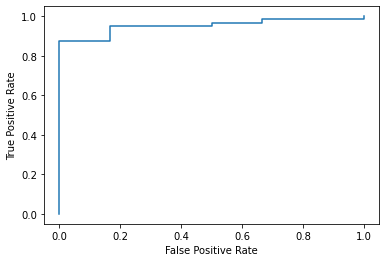

AUC SCORE:0.9523809523809524


In [51]:
test_pred1_prob=rf.predict_proba(training_test)[:,1]
fpr,tpr,thresholds=roc_curve(testing_test,test_pred1_prob)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print(f'AUC SCORE:{roc_auc_score(testing_test,test_pred1_prob)}')

#  Logistics Regression

In [54]:
log_model = LogisticRegression()
log_model.fit(training_train,testing_train)


LogisticRegression()

In [55]:
train_pred=log_model.predict(training_train)
print("Accuracy on training data: ", metrics.accuracy_score(testing_train,train_pred))
print("Precision on training data:", metrics.precision_score(testing_train, train_pred))
print("Recall on training data:", metrics.recall_score(testing_train, train_pred))

Accuracy on training data:  0.9178743961352657
Precision on training data: 0.9388888888888889
Recall on training data: 0.9657142857142857


In [56]:
test_pred=log_model.predict(training_test)
print("Accuracy on testing data: ", metrics.accuracy_score(testing_test, test_pred))
print("Precision on testing data:", metrics.precision_score(testing_test,test_pred))
print("Recall on testing data: ", metrics.recall_score(testing_test, test_pred))

Accuracy on testing data:  0.9420289855072463
Precision on testing data: 0.9538461538461539
Recall on testing data:  0.9841269841269841


TN=3, FP=3, FN=1, TP=62


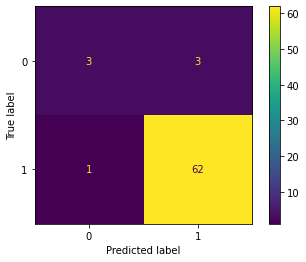

In [57]:
cm = metrics.confusion_matrix(testing_test, test_pred)
TN, FP, FN, TP = cm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [61]:
ca = (TP+TN)/(TP+TN+FP+FN)
cp = (TP)/(TP+FP)
cr = (TP)/(TP+FN)
cF1_score = (2 * cp * cr) / (cp + cr)
print("Calculated accuracy = ", ca)
print("Calculated precision = ", cp)
print("Calculated recall = ", cr)



Calculated accuracy =  0.9420289855072463
Calculated precision =  0.9538461538461539
Calculated recall =  0.9841269841269841


([<matplotlib.axis.XTick at 0x240bd44dc10>,
 [Text(0, 0, 'accuracy'), Text(1, 0, 'precision'), Text(2, 0, 'recall')])

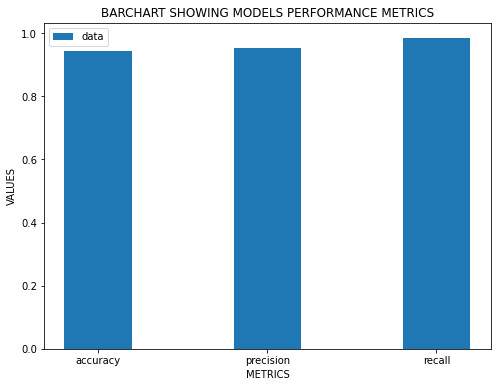

In [62]:
w=0.4
a = ["accuracy", "precision", "recall"]

data = [ca, cp, cr]

bar1 = np.arange(len(a))

plt.figure(figsize=(8,6))
plt.bar(bar1,data, w, label="data")

plt.xlabel ("METRICS")
plt.ylabel ("VALUES")
plt.title ("BARCHART SHOWING MODELS PERFORMANCE METRICS")
plt.legend()
plt.xticks(bar1, a)

 #  DROPPING THE GENDER ATTRIBUTE

In [63]:
training_train_gb = training_train.drop(columns=['gender',])
training_test_gb = training_test.drop(columns=['gender', ])
                                               



In [65]:
#Train a new LG model:
model_gb = LogisticRegression()
model_gb.fit(training_train_gb,testing_train)

LogisticRegression()

In [66]:
#Training data without the gender attributes:
train_predict_gb=model_gb.predict(training_train_gb)
print("Accuracy on train data: ", metrics.accuracy_score(testing_train, train_predict_gb))
print("Precision using train data:", metrics.precision_score(testing_train, train_predict_gb))
print("Recall using train data:", metrics.recall_score(testing_train, train_predict_gb))




Accuracy on train data:  0.9033816425120773
Precision using train data: 0.918918918918919
Recall using train data: 0.9714285714285714


In [67]:
#Testing data without the gender attributes:
test_predict_gb=model_gb.predict(training_test_gb)
print("Accuracy on test data: ", metrics.accuracy_score(testing_test, test_predict_gb))
print("Precision using test data:", metrics.precision_score(testing_test, test_predict_gb))
print("Recall on testing data: ", metrics.recall_score(testing_test, test_predict_gb))

Accuracy on test data:  0.9565217391304348
Precision using test data: 0.9545454545454546
Recall on testing data:  1.0


TN=3, FP=3, FN=0, TP=63


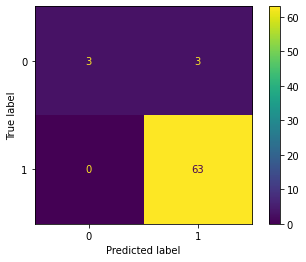

In [68]:
cm_gb= metrics.confusion_matrix(testing_test, test_predict_gb)
TN, FP, FN, TP = cm_gb.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_gb)
disp.plot()
plt.show()

In [69]:
ca = (TP+TN)/(TP+TN+FP+FN)
cp = (TP)/(TP+FP)
cr = (TP)/(TP+FN)
cF1_score = (2 * cp * cr) / (cp + cr)
print("Calculated accuracy with gender unaware = ", ca)
print("Calculated precision with gender unaware = ", cp)
print("Calculated recall with gender unaware = ", cr)

Calculated accuracy with gender unaware =  0.9565217391304348
Calculated precision with gender unaware =  0.9545454545454546
Calculated recall with gender unaware =  1.0


In [ ]:
# from the analysis, we discover that the accuracy for the X_Test which includes Gender was 0.94
# While the accuracy for the X_Test which doesnt include Gender was  0.95
#Also the precision for the X_Test which includes Gender was 0.953
# while precision for the X_Test that doesnt include Gender was 0.954
#Furthermore, the recall for X_Test with Gender was 0.984
# while the recall for the X_Test without Gender was 1.0
# Therefore, we can conclude that there was a slight increase in the accuracy and precision for the X_Test data that doesnt include Gender
# as compared with the one that included gender
# while the Recall remain the same for both the two testing data

In [70]:
PROTECTED  =  "gender" 
MEN =  1.0 #male 
WOMEN = 0.0 #women
men_indices = np.where(training_test[PROTECTED] == MEN)[0]
women_indices = np.where(training_test[PROTECTED] == WOMEN)[0]
print(men_indices, "No of Men =", men_indices.size)
print(women_indices, "No of Women =", women_indices.size)

[ 2  4  7  8  9 10 11 12 14 18 21 22 24 25 26 29 30 31 33 34 36 40 41 42
 43 45 49 51 54 55 58 60 63 65] No of Men = 34
[ 0  1  3  5  6 13 15 16 17 19 20 23 27 28 32 35 37 38 39 44 46 47 48 50
 52 53 56 57 59 61 62 64 66 67 68] No of Women = 35


Actual number of Men and Women using the model

In [71]:
testing_test_m = [testing_test.values[i] for i in men_indices]
testing_test_f = [testing_test.values[i] for i in women_indices]
print(testing_test_m)
print(testing_test_f)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1]


In [72]:
test_pred_m = [test_pred[i] for i in men_indices]
test_pred_f = [test_pred[i] for i in women_indices]
print(test_pred_m)
print(test_pred_f)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]


In [73]:
print(metrics.classification_report(testing_test_m, test_pred_m))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.97      0.98        33

    accuracy                           0.97        34
   macro avg       0.75      0.98      0.83        34
weighted avg       0.99      0.97      0.98        34



#  Metrics Performance for Men

TN=1, FP=0, FN=1, TP=32


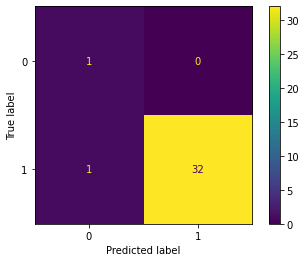

In [74]:
cm_men = metrics.confusion_matrix(testing_test_m, test_pred_m)
TN, FP, FN, TP = cm_men.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_men)
disp.plot()
plt.show()

In [75]:
print (metrics.classification_report(testing_test_m,test_pred_m ))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.97      0.98        33

    accuracy                           0.97        34
   macro avg       0.75      0.98      0.83        34
weighted avg       0.99      0.97      0.98        34



In [76]:
c_a = (TP+TN)/(TP+TN+FP+FN)
positive_rate = (32) / (34)
print("Calculated accuracy for male = ", c_a)
print('Positive rate for male = ', positive_rate)

Calculated accuracy for male =  0.9705882352941176
Positive rate for male =  0.9411764705882353


#  Metrics Performance for Women

TN=2, FP=3, FN=0, TP=30


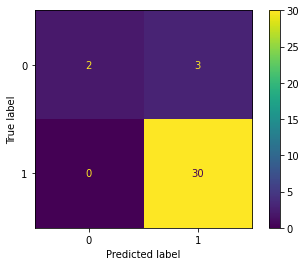

In [77]:
cm_women = metrics.confusion_matrix(testing_test_f, test_pred_f)
TN, FP, FN, TP = cm_women.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_women)
disp.plot()
plt.show()

In [78]:
print (metrics.classification_report(testing_test_f,test_pred_f ))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.91      1.00      0.95        30

    accuracy                           0.91        35
   macro avg       0.95      0.70      0.76        35
weighted avg       0.92      0.91      0.90        35



In [79]:
c_a1 = (TP+TN)/(TP+TN+FP+FN)
positive_rate = (33) / 34
print("Calculated accuracy for female = ", c_a1)
print('Positive rate for female : {0:0.2f}'.format(positive_rate))

Calculated accuracy for female =  0.9142857142857143
Positive rate for female : 0.97
